In [1]:
import pandas as pd
import random

from functools import partial
import math
import os
import tqdm
import numpy as np
#import bamboolib as bam
import sklearn
from matplotlib import pyplot 
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
    
from kneed import KneeLocator
import scipy
    

In [2]:
import networkx as nx
import networkx.algorithms.community as nx_comm
from ipysigma import Sigma
import community as community_louvain
import matplotlib.cm as cm
import igraph as ig

# Chargement et préparation des données

In [3]:
aymeric = "/home/aymeric/python-scripts/anses_medialab/datas" #aymeric
jp = 'd:/Projects/Medialab/Anses/' # Jean Philippe

path= aymeric
tfidf='tfidf'
#domain='media'
#domain='twitter'
#domain='facebook'

index_file_JP="indexation_results/index_alldefault_nameexhaustive_aymeric.csv"
index_file_AL=f"index_alldefault_nameexhaustive_aymeric.csv"
term_specific ="list_100_term_chi2.csv"
index_file=f"{path}/{index_file_AL}"
index_file

'/home/aymeric/python-scripts/anses_medialab/datas/index_alldefault_nameexhaustive_aymeric.csv'

In [4]:
df=pd.read_csv(index_file, sep='\t', dtype={"doc_id" :"string", "sent_id": "string"})
specific_term = pd.read_csv(f"{path}/{term_specific}", sep=',')
specific_term = specific_term.drop(columns=["Unnamed: 2"])
list_periods = pd.read_csv(f'{path}/analyse_periods/list_periods_all_sources.csv', sep=',')

In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['yearmonth']=(df['date'].dt.strftime('%Y-%m'))
df=df[~df['yearmonth'].isin(['2008-04', '2010-01','2021-02'])]
df=df.dropna(subset=['yearmonth'])
len(df)

7832372

In [6]:
df0 = df.drop_duplicates()
df0 = df0.merge(list_periods, on = ["origin", "yearmonth"], how= "left")

## Fréquence des termes par documents (sur facebook)

In [7]:
df0["doc_sent_id"] = df0["doc_id"]+"_"+df0["sent_id"]

In [75]:
l = []
if l is Null:
    

,term,doc_id,sent_id,origin,source,date,yearmonth,P_twitter,P_media,P_facebook,doc_sent_id
0,glyphosate,707244725942747136,1,twitter,Titrespresse.com,2016-03-08,2016-03,4.0,8.0,6.0,707244725942747136_1
1,europe,707244725942747136,1,twitter,Titrespresse.com,2016-03-08,2016-03,4.0,8.0,6.0,707244725942747136_1
2,pesticides,1396436134209720320,0,twitter,ChachaP,2021-05-23,2021-05,7.0,10.0,11.0,1396436134209720320_0
3,herbicide,1396436134209720320,0,twitter,ChachaP,2021-05-23,2021-05,7.0,10.0,11.0,1396436134209720320_0
4,glyphosate,1396436134209720320,0,twitter,ChachaP,2021-05-23,2021-05,7.0,10.0,11.0,1396436134209720320_0
...,...,...,...,...,...,...,...,...,...,...,...
3836926,sortie,968101561401561088,0,twitter,RiskAssur/Notre-Siecle/PereLaFouine,2018-02-26,2018-02,5.0,8.0,7.0,968101561401561088_0
3836927,sortie du glyphosate,968101561401561088,0,twitter,RiskAssur/Notre-Siecle/PereLaFouine,2018-02-26,2018-02,5.0,8.0,7.0,968101561401561088_0
3836928,glyphosate,968101561401561088,0,twitter,RiskAssur/Notre-Siecle/PereLaFouine,2018-02-26,2018-02,5.0,8.0,7.0,968101561401561088_0
3836929,nicolas hulot,968101561401561088,0,twitter,RiskAssur/Notre-Siecle/PereLaFouine,2018-02-26,2018-02,5.0,8.0,7.0,968101561401561088_0


In [96]:
def term_doc_freq(data, name_period, origin, period, what, targeted_terms, N):
    
    df_p = data.loc[(data["origin"]== origin) & (data[name_period]== period)]
    
    if len(targeted_terms) > 0:
        doc_with_targeted_terms = df_p.loc[df_p["term"].isin(targeted_terms)]
        doc_with_glypho = glypho["doc_id"].to_list()
        df_p = df_p.merge(doc_with_targeted_terms[["doc_id"]], on = ["doc_id"], how = "inner")
    else:
        pass

 
    
    if origin == "facebook":
        # Step: Keep rows where origin is one of: facebook
        specific_term_origin = specific_term.loc[(specific_term['origin'] == 'facebook') & 
                                          (specific_term["P"] == period)]
        
        specific_term_origin = specific_term_origin.sort_values(by=['chi2'], ascending=[False]).reset_index().head(N)
        topN = specific_term_origin["term"]
        
    elif origin == "media":
        specific_term_origin = specific_term.loc[(specific_term['origin'] == 'media') & 
                                      (specific_term["P"] == period)]
        
        specific_term_origin = specific_term_origin.sort_values(by=['chi2'], ascending=[False]).reset_index().head(N)
        topN = specific_term_origin["term"]
    
    elif origin == "twitter":
        specific_term_origin = specific_term.loc[(specific_term['origin'] == 'twitter') & 
                                      (specific_term["P"] == period)]
        
        specific_term_origin = specific_term_origin.sort_values(by=['chi2'], ascending=[False]).reset_index().head(N)
        topN = specific_term_origin["term"]
    
    #topN = df_p["term"].value_counts().index[:N]
    df_p=df_p.loc[(df_p["origin"]==origin) & (df_p["term"].isin(topN))]

    df_term_freq = df_p.groupby(['term', what]).agg(freq=('sent_id', 'size')).reset_index()
    return df_term_freq

In [197]:
def term_doc_freq(data, name_period, origin, period, what, targeted_terms, N):
    
    df_p = data.loc[(data["origin"]== origin)]# & (data[name_period]<= period)]
    
    if len(targeted_terms) > 0:
        doc_with_targeted_terms = df_p.loc[df_p["term"].isin(targeted_terms)]
        doc_with_glypho = glypho["doc_id"].to_list()
        df_p = df_p.merge(doc_with_targeted_terms[["doc_id"]], on = ["doc_id"], how = "inner")
    else:
        pass
        
    topN=df_p["term"].value_counts().index[:N]
    
    #topN = df_p["term"].value_counts().index[:N]
    df_p=df_p.loc[(df_p["term"].isin(topN))]

    df_term_freq = df_p.groupby(['term', what]).agg(freq=('sent_id', 'size')).reset_index()
    return df_term_freq

## Création de la matrice termes-termes
multiplication de la matrice documents-termes par sa transposée

In [172]:
def create_term_term_matrix(data, what):
    table = pd.pivot_table(data, 
                           values='freq', index=[what],columns=["term"], aggfunc=np.sum, fill_value=0, observed = True)
    
    term_term = np.dot(table.T, table) # multiplication de la transposé de
    return term_term, table

In [160]:
def mutual_information_matrix(matrix): # a term_term matrix
    mi_matrix = []
    #freq_term = [x for x in matrix.diagonal()] # pour obtenir la fréquence de chaque terme (somme de chaque ligne)
    freq_term = np.sum(matrix,axis=1).tolist() - matrix.diagonal()
    
    #Nombre de paires est égale à la somme des lignes moins la diagonale (à diviser par 2?)
    #Nb_pairs = (sum(np.sum(matrix,axis=1).tolist()) -  sum(freq_term))/2 
    Nb_pairs = sum(freq_term)
    for i in range(len(matrix)):
        list_mi = []
        for j in range(len(matrix)):
            nb_cooc = matrix[i,j] #nombre de cooccurrences des termes i et j
            freq_i = freq_term[i] # fréquence de i
            freq_j = freq_term[j] # fréquence de j
        
            if i == j : 
                mutual_info = 0
            else:
                if nb_cooc == 0 :
                    mutual_info = 0
                else: #calcule mutual information
                    num = (nb_cooc*Nb_pairs)
                    denom = freq_i*freq_j
                    mutual_info = np.log(num/denom)
                    if mutual_info < 0:
                        mutual_info = 0

            list_mi.append(mutual_info)
        mi_matrix.append(list_mi)
    return mi_matrix

In [159]:
mi_matrix = []
freq_term = np.sum(term_term,axis=1).tolist() - term_term.diagonal() # pour obtenir la fréquence de chaque terme (somme de chaque ligne)
#Nombre de paires est égale à la somme des lignes moins la diagonale (à diviser par 2?)

freq_term
Nb_pairs

array([ 178869,     768,      46, 1287513,      93,  177720,    1652,
        177674,    1504,     768,      93,  521586,  177822,     148,
        177720,     148,     148,  350546,     148,     148,  178442,
        177674,     132,  177674,      93,  178119,     148,      46,
        178442,  177858,     184,     148,     139,  177674,      93,
           952,      93,     768,      93,     768, 1144667,     210,
            46,     768,     768,  352772,     593,  350546,     148,
            46,      46,     688,  177674,     148,     280,  351735,
        842002,  177720,     768,     148,     360,     768,      46,
           148,     768,      46,  177767,     916,     916,  183192,
            93,  178119,     241,     184,     287,     768,     561,
        350730,      93,  351407,      46,      93,     184,  178488,
           768, 2162362,  177674,  177674,  177674,  177674,      46,
          1006,     148,    1041,     768,     768,     445,     952,
        177674,     

## Calcule du cosine

In [92]:
def find_k_neighbor(mi_matrix, precompute):
    mi_array = np.array(mi_matrix)
    
    if precompute == True:
        m =scipy.sparse.csc_matrix(mi_array)
        dist=metrics.pairwise.cosine_distances(m)
        list_voisin = []
        list_voisin_dist =[]
        samples = dist, x
        neigh = NearestNeighbors(n_neighbors=6, metric='precomputed')
        neigh.fit(samples)
        for x in range(len(dist)):
            voisins = neigh.kneighbors(dist[[x]], return_distance=True)
            voisins_dist = voisins[0].tolist()
            voisins_id = voisins[1].tolist()
            #print(voisins_id)
            list_voisin.append(voisins_id[0])
            list_voisin_dist.append(voisins_dist[0])
    else:
        list_voisin = []
        list_voisin_dist =[]
        samples = mi_array
        neigh = NearestNeighbors(n_neighbors=6, metric='cosine')
        neigh.fit(samples)
        for x in range(len(mi_array)):
            voisins = neigh.kneighbors(mi_array[[x]], return_distance=True)
            voisins_dist = voisins[0].tolist()
            voisins_id = voisins[1].tolist()
            #print(voisins_id)
            list_voisin.append(voisins_id[0])
            list_voisin_dist.append(voisins_dist[0])
    return list_voisin, list_voisin_dist
    
    
        

In [93]:
def matrix_to_df(list_voisin, list_voisin_dist, table):
    df_dist = pd.DataFrame(list_voisin_dist)
    df_dist["term"] = table.columns
    df_dist["id"] = df_dist.index
    list_id = []
    list_term = []
    list_voisins_dist =[]
    for x, term in enumerate(df_dist["term"]):
        for col in df_dist.columns[0:-2]:
            list_id.append(x)
            list_term.append(term)
            neig_dist = df_dist[col].iloc[x]
            list_voisins_dist.append(neig_dist)
    data = {"id": list_id, "term": list_term, "distances":list_voisins_dist}
    df_dist_voisin = pd.DataFrame(data)#dtype={"id" :"string"})
    df_dist_voisin["row_id"] = df_dist_voisin.index #.astype('str')
    df_dist_voisin = df_dist_voisin.astype({"id": str, "row_id": str})

    df_voisin = pd.DataFrame(list_voisin)
    df_voisin["term"] = table.columns
    df_voisin["id"] = df_voisin.index
    list_id = []
    list_term = []
    list_voisins =[]
    for x, term in enumerate(df_voisin["term"]):
        for col in df_voisin.columns[0:-2]:
            list_id.append(x)
            list_term.append(term)
            neig = df_voisin[col].iloc[x]
            list_voisins.append(neig)
    data = {"id": list_id, "term": list_term, "voisins":list_voisins}
    df_voisin = pd.DataFrame(data)
    df_voisin["row_id"] = df_voisin.index
    df_voisin = df_voisin.astype({"id": str, "row_id": str, "voisins" : str})
    df_voisin = df_voisin.merge(df_dist_voisin, on=["row_id", "term", "id"], how = "left")
    
    df_id = df_voisin[["id", "term"]].drop_duplicates()
    df_id["voisins"] = df_id["id"].astype('str')
    df_id = df_id.astype({"voisins": str, "id": str})
    df_voisin = df_voisin.merge(df_id, on=["voisins"], how ="left")
    
    df_voisin = df_voisin.drop(columns=["voisins"])
    df_voisin["id_x"] = "id_"+df_voisin["id_x"]
    df_voisin["id_y"] = "id_"+df_voisin["id_y"]
    df_voisin["row_id"] = "row_id_"+df_voisin["row_id"]
    df_voisin = df_voisin.loc[df_voisin["term_x"]!=df_voisin["term_y"]]
    
    return df_voisin

In [231]:
df_term_freq = term_doc_freq(data = df0, origin = "twitter", 
                             name_period = "P_twitter", period = 7, 
                             what = "doc_id", targeted_terms = [],
                            N = 1000)


In [ ]:
term_term, table = create_term_term_matrix(data = df_term_freq,  what ="doc_id")

In [202]:
mi_matrix = mutual_information_matrix(matrix= term_term)

In [203]:
list_voisin, list_voisin_dist = find_k_neighbor(mi_matrix = mi_matrix, precompute = "True")

In [204]:
df_voisin = matrix_to_df(list_voisin, list_voisin_dist, table)

In [205]:
#df_voisin.to_csv(f"{path}/analyse_periods/5_plus_proche_voisins_periode_0_fb.csv", sep =",")

In [213]:
df_voisin0 = df_voisin[["term_x", "term_y", "distances"]].loc[df_voisin["distances"]>= 0.2]


<AxesSubplot:>

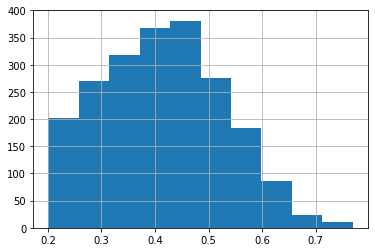

In [214]:
df_voisin0.distances.hist()

In [215]:
G = nx.from_pandas_edgelist(df_voisin0, 'term_x', 'term_y', ['distances'])

In [227]:
#first compute the best partition
partition = community_louvain.best_partition(G, weight = "distances",resolution=2)
list_communities = [partition[x] for x in partition]
set(list_communities)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [228]:
value = {i for i in partition if partition[i]==0}
value

{'% des échantillons',
 '@genefutures',
 'allemagne',
 'ania',
 'animal',
 'autorité',
 'concentration maximale admissible',
 'concentration supérieure',
 'consommateurs',
 'contrôle',
 'fipronil',
 'futures',
 'génération',
 'générations futures',
 'industrie alimentaire',
 'limite',
 'limite réglementaire',
 'limites maximales',
 'liste des produits',
 'lmr',
 "oxyde d'éthylène",
 'résidus',
 'résidus de pesticides',
 'substance toxique',
 'traces',
 'traces de fipronil',
 'ufc-que',
 'élevage',
 'œuf'}

In [229]:
nx.set_node_attributes(G, partition, 'louvain')

In [184]:
Sigma(G, node_size = G.degree, node_color = partition)

Sigma(nx.Graph with 305 nodes and 1,150 edges)

In [230]:
Sigma(G, node_size = G.degree, node_color = partition)

Sigma(nx.Graph with 453 nodes and 1,630 edges)